# `panCleave`: Basic walk-through

- This notebook is a quick walk-through to beta test the full `panCleave` pipeline.
- Please **resave this template to a new notebook** before editing or running.
- Bear in mind that this package is still under development.

*Prepared by Jacqueline R. M. A. Maasch* | *February 2021*

## Table of contents
- [Preamble](#Preamble)
- [Execute pipeline](#Execute-pipeline)
- [Filter predictions](#Filter-predictions)
- [Map fragments to precursor proteins](#Map-fragments-to-precursor-proteins)
- [Generate fragment IDs](#Generate-fragment-IDs)

## Preamble

In [1]:
%cd "../scripts/"

# Importations.
import pancleave
import pandas as pd
import sys
import time
import numpy as np  # Import for version test only; only used internal to pancleave.
import Bio          # Import for version test only; only used internal to pancleave.

# View versions.
print("\nCurrent version of python:", sys.version)
print("\nCurrent version of pandas:", pd.__version__)
print("\nCurrent version of numpy:", np.__version__)
print("\nCurrent version of biopython:", Bio.__version__, "\n")

# NOTE: View full requirements file @ requirements.txt.
# !pip freeze > requirements.txt

/Users/jacquelinemaasch/Desktop/machineBiology/pancleave/scripts

Current version of python: 3.10.2 (v3.10.2:a58ebcc701, Jan 13 2022, 14:50:16) [Clang 13.0.0 (clang-1300.0.29.30)]

Current version of pandas: 1.4.1

Current version of numpy: 1.22.2

Current version of biopython: 1.79 



In [2]:
%%capture
'''
JM's machine:

Current version of python: 3.8.3 (default, Jul  2 2020, 11:26:31) [Clang 10.0.0 ]
Current version of pandas: 1.0.5
Current version of numpy: 1.18.5
Current version of biopython: 1.78
'''

## Execute pipeline

The following functionality returns `panCleave` cleavage site predictions and the resulting peptide fragments.

In [4]:
%cd "../tutorials/"

# Read data file.
df = pd.read_csv("pancleave_demo_seqs.csv")

# Explore data.
print(df.info())
display(df)

/Users/jacquelinemaasch/Desktop/machineBiology/pancleave/tutorials
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   UniProt entry ID    10 non-null     object
 1   UniProt entry name  10 non-null     object
 2   Protein name        10 non-null     object
 3   Sequence            10 non-null     object
dtypes: object(4)
memory usage: 448.0+ bytes
None


UniProt entry ID UniProt entry name  \
0           Q96PX8        SLIK1_HUMAN   
1           Q9BQ16        TICN3_HUMAN   
2           Q9NRS4        TMPS4_HUMAN   
3           Q9UBV4        WNT16_HUMAN   
4           Q6ZRP7        QSOX2_HUMAN   
5           P35030         TRY3_HUMAN   
6           Q9GZX9        TWSG1_HUMAN   
7           P55089         UCN1_HUMAN   
8           P02786         TFR1_HUMAN   
9           P19438        TNR1A_HUMAN   

                                        Protein name  \
0  SLIT and NTRK-like protein 1 (Leucine-rich rep...   
1  Testican-3 (SPARC/osteonectin, CWCV, and Kazal...   
2  Transmembrane protease serine 4 (EC 3.4.21.-) ...   
3                                     Protein Wnt-16   
4  Sulfhydryl oxidase 2 (EC 1.8.3.2) (Neuroblasto...   
5  Trypsin-3 (EC 3.4.21.4) (Brain trypsinogen) (M...   
6             Twisted gastrulation protein homolog 1   
7                                          Urocortin   
8  Transferrin receptor protein 1 (TR) (TfR) (TfR...   
9  Tumor necrosis factor receptor superfamily mem...   

                                            Sequence  
0  MLLWILLLETSLCFAAGNVTGDVCKEKICSCNEIEGDLHVDCEKKG...  
1  MLKVSAVLCVCAAAWCSQSLAAAAAVAAAGGRSDGGNFLDDKQWLT...  
2  MLQDPDSDQPLNSLDVKPLRKPRIPMETFRKVGIPIIIALLSLASI...  
3  MDRAALLGLARLCALWAALLVLFPYGAQGNWMWLGIASFGVPEKLG...  
4  MAAAGAAVARSPGIGAGPALRARRSPPPRAARLPRLLVLLAAAAVG...  
5  MCGPDDRCPARWPGPGRAVKCGKGLAAARPGRVERGGAQRGGAGLE...  
6  MKLHYVAVLTLAILMFLTWLPESLSCNKALCASDVSKCLIQELCQC...  
7  MRQAGRAALLAALLLLVQLCPGSSQRSPEAAGVQDPSLRWSPGARN...  
8  MMDQARSAFSNLFGGEPLSYTRFSLARQVDGDNSHVEMKLAVDEEE...  
9  MGLSTVPDLLLPLVLLELLVGIYPSGVIGLVPHLGDREKRDSVCPQ...

In [5]:
# Init pipeline object.
panCleave = pancleave.Pipeline()

In [6]:
# View method documentation, if needed.
panCleave.execute_pipeline?

Signature: panCleave.execute_pipeline(seq_list, confidence=None, aa_code='one')
Docstring:
This method executes the entire panCleave pipeline, from sequence
encoding to cleavage site prediction and putative encrypted peptide 
fragmentation.

Parameters:
    seq_list: a list of strings representing initial protein sequences 
        in one-letter amino acid code.
    confidence (default = None): a float or None-type indicating the
        desired confidence threshold for class label probability
        estimates. If the user does not wish to filter predicted
        cleavage sites by model confidence (i.e. probability threshold),
        pass None. Else, set value to < 0.5 and >= 1. Filtering by
        threshold will only return cryptides resulting from cleavages
        of the given probability threshold or higher. This parameter must
        be set to None if probability estimates are not returned by 
        the model.
    aa_code (default = "one"): string indicating format of origi

In [8]:
%cd "../model/"

# Execute full pipeline on raw sequences.
# Pipeline includes ProtFP sequence encoding and cleavage prediction.
start_time = time.time()
df_cleave = panCleave.execute_pipeline(df["Sequence"])
print("Pipeline executed in {} seconds.\n".format(time.time() - start_time))

# View output dataframe.
display(df_cleave)

/Users/jacquelinemaasch/Desktop/machineBiology/pancleave/model
Pipeline executed in 13.778460025787354 seconds.



Sequence  \
0  MLLWILLLETSLCFAAGNVTGDVCKEKICSCNEIEGDLHVDCEKKG...   
1  MLKVSAVLCVCAAAWCSQSLAAAAAVAAAGGRSDGGNFLDDKQWLT...   
2  MLQDPDSDQPLNSLDVKPLRKPRIPMETFRKVGIPIIIALLSLASI...   
3  MDRAALLGLARLCALWAALLVLFPYGAQGNWMWLGIASFGVPEKLG...   
4  MAAAGAAVARSPGIGAGPALRARRSPPPRAARLPRLLVLLAAAAVG...   
5  MCGPDDRCPARWPGPGRAVKCGKGLAAARPGRVERGGAQRGGAGLE...   
6  MKLHYVAVLTLAILMFLTWLPESLSCNKALCASDVSKCLIQELCQC...   
7  MRQAGRAALLAALLLLVQLCPGSSQRSPEAAGVQDPSLRWSPGARN...   
8  MMDQARSAFSNLFGGEPLSYTRFSLARQVDGDNSHVEMKLAVDEEE...   
9  MGLSTVPDLLLPLVLLELLVGIYPSGVIGLVPHLGDREKRDSVCPQ...   

                                               Sites  \
0  [MLLWILLL, LLWILLLE, LWILLLET, WILLLETS, ILLLE...   
1  [MLKVSAVL, LKVSAVLC, KVSAVLCV, VSAVLCVC, SAVLC...   
2  [MLQDPDSD, LQDPDSDQ, QDPDSDQP, DPDSDQPL, PDSDQ...   
3  [MDRAALLG, DRAALLGL, RAALLGLA, AALLGLAR, ALLGL...   
4  [MAAAGAAV, AAAGAAVA, AAGAAVAR, AGAAVARS, GAAVA...   
5  [MCGPDDRC, CGPDDRCP, GPDDRCPA, PDDRCPAR, DDRCP...   
6  [MKLHYVAV, KLHYVAVL, LHYVAVLT, HYVAVLTL, YVAVL...   
7  [MRQAGRAA, RQAGRAAL, QAGRAALL, AGRAALLA, GRAAL...   
8  [MMDQARSA, MDQARSAF, DQARSAFS, QARSAFSN, ARSAF...   
9  [MGLSTVPD, GLSTVPDL, LSTVPDLL, STVPDLLL, TVPDL...   

                                         Predictions  \
0  [Negative, Negative, Positive, Positive, Negat...   
1  [Negative, Negative, Positive, Negative, Negat...   
2  [Negative, Negative, Positive, Negative, Posit...   
3  [Negative, Positive, Positive, Negative, Posit...   
4  [Positive, Positive, Positive, Positive, Posit...   
5  [Negative, Positive, Negative, Negative, Negat...   
6  [Negative, Negative, Negative, Negative, Negat...   
7  [Negative, Negative, Positive, Negative, Posit...   
8  [Negative, Negative, Positive, Negative, Negat...   
9  [Positive, Negative, Negative, Negative, Posit...   

                                       Probabilities  \
0  [0.7543711432079276, 0.8109787134842291, 0.505...   
1  [0.7410030860522352, 0.5115492778849977, 0.579...   
2  [0.5100588255913339, 0.7894970604838062, 0.822...   
3  [0.5479732248960191, 0.6151681119662925, 0.646...   
4  [0.7081405774481939, 0.7319908052581234, 0.714...   
5  [0.844931369123223, 0.6364663104460897, 0.5432...   
6  [0.5753791705012683, 0.5623661023359164, 0.771...   
7  [0.6074063626002483, 0.5027359575946068, 0.664...   
8  [0.6279850426276513, 0.6348767423344627, 0.668...   
9  [0.6855958264194523, 0.5795813191151815, 0.878...   

                                           Fragments  
0  [MLLWIL, L, LETSLC, F, AA, G, N, VT, GD, VC, K...  
1  [MLKVSA, VLC, VC, AAAWCSQS, L, A, A, A, A, A, ...  
2  [MLQDPD, SD, QPLN, SL, D, VKP, LR, KPR, IPMETF...  
3  [MDRAA, L, LG, LAR, LCA, LWA, A, L, L, VL, FPY...  
4  [MAAA, G, A, A, V, A, R, SPG, IG, AGPALR, AR, ...  
5  [MCGPD, DRCPAR, WPGPGR, AVK, CGK, G, L, A, A, ...  
6  [MKLHYVAVL, T, LAILMFLT, WLPESLSCNKAL, C, AS, ...  
7  [MRQAGR, AA, L, L, A, A, L, L, L, LVQ, LCPGSSQ...  
8  [MMDQAR, SAFSN, LF, G, GEPLS, YTRFSLA, R, Q, V...  
9  [MGLS, TVPD, L, LLPL, VL, LE, L, L, VG, IYPSG,...

## Filter predictions

The following functionality is useful for filtering `panCleave` predictions by user-specified criteria.

In [9]:
# Cleave precursor sequences post-hoc, given desired probability threshold.
df_cleave["Fragments (Pr >= 0.7)"] = panCleave.cleave_post_hoc(df_cleave["Sequence"], 
                                                               df_cleave["Sites"],
                                                               df_cleave["Predictions"], 
                                                               df_cleave["Probabilities"], 
                                                               confidence = 0.7)

# View dataframe with new fragments column.
display(df_cleave.head())

Sequence  \
0  MLLWILLLETSLCFAAGNVTGDVCKEKICSCNEIEGDLHVDCEKKG...   
1  MLKVSAVLCVCAAAWCSQSLAAAAAVAAAGGRSDGGNFLDDKQWLT...   
2  MLQDPDSDQPLNSLDVKPLRKPRIPMETFRKVGIPIIIALLSLASI...   
3  MDRAALLGLARLCALWAALLVLFPYGAQGNWMWLGIASFGVPEKLG...   
4  MAAAGAAVARSPGIGAGPALRARRSPPPRAARLPRLLVLLAAAAVG...   

                                               Sites  \
0  [MLLWILLL, LLWILLLE, LWILLLET, WILLLETS, ILLLE...   
1  [MLKVSAVL, LKVSAVLC, KVSAVLCV, VSAVLCVC, SAVLC...   
2  [MLQDPDSD, LQDPDSDQ, QDPDSDQP, DPDSDQPL, PDSDQ...   
3  [MDRAALLG, DRAALLGL, RAALLGLA, AALLGLAR, ALLGL...   
4  [MAAAGAAV, AAAGAAVA, AAGAAVAR, AGAAVARS, GAAVA...   

                                         Predictions  \
0  [Negative, Negative, Positive, Positive, Negat...   
1  [Negative, Negative, Positive, Negative, Negat...   
2  [Negative, Negative, Positive, Negative, Posit...   
3  [Negative, Positive, Positive, Negative, Posit...   
4  [Positive, Positive, Positive, Positive, Posit...   

                                       Probabilities  \
0  [0.7543711432079276, 0.8109787134842291, 0.505...   
1  [0.7410030860522352, 0.5115492778849977, 0.579...   
2  [0.5100588255913339, 0.7894970604838062, 0.822...   
3  [0.5479732248960191, 0.6151681119662925, 0.646...   
4  [0.7081405774481939, 0.7319908052581234, 0.714...   

                                           Fragments  \
0  [MLLWIL, L, LETSLC, F, AA, G, N, VT, GD, VC, K...   
1  [MLKVSA, VLC, VC, AAAWCSQS, L, A, A, A, A, A, ...   
2  [MLQDPD, SD, QPLN, SL, D, VKP, LR, KPR, IPMETF...   
3  [MDRAA, L, LG, LAR, LCA, LWA, A, L, L, VL, FPY...   
4  [MAAA, G, A, A, V, A, R, SPG, IG, AGPALR, AR, ...   

                               Fragments (Pr >= 0.7)  
0  [MLLWILLLETSLCFAAGN, VTGD, VCKEKICSCNEIEGD, LH...  
1  [MLKVSAVLCVCAAAWCSQSLA, A, AA, A, VA, A, AGGR,...  
2  [MLQDPD, SD, QPLNSLD, VKPLRKPRIPMETFRKVGIPIIIA...  
3  [MDRAALLGLARLCALWAALLVLFPYGAQGNWMWLGIASFGVPEKL...  
4  [MAAA, G, A, A, VAR, SPGIGAGPALR, ARR, SPPPRAA...

In [10]:
# Filter results: remove redundancies and fragments of undesired length.
frags_filtered = panCleave.filter_results(df_cleave["Fragments (Pr >= 0.7)"], 
                                          min_len = 10,  # Set to None for no min.
                                          max_len = 30, # Set to None for no max.
                                          verbose = True)

# Only unique fragments with lengths between 10 and 30 residues should remain.
# Note: returned data structure is an unnested list with no precursor:fragment association.
display(frags_filtered[:10])


Total cleavage products: 228

Total unique cleavage products: 202

Total unique cleavage products >= 10 and <= 30 residues: 68 



['VERGGAQRGGAGLELHPLLGGRTWRAAR',
 'KNGRLVYLVENPGGYVAYSKAAT',
 'VLKEIKILNIFGVIK',
 'FPAARRLYWDDLKRKLS',
 'MLKVSAVLCVCAAAWCSQSLA',
 'MCGPDDRCPARWPGPGRAVKCGKGLAA',
 'IPGTQGRECNRTSEGAD',
 'VCKEKICSCNEIEGD',
 'SGVGTALLLKLAQ',
 'VLDQLTSIIQID']

In [11]:
# Instantiate Utils() object to access various utility functions.
utils = pancleave.Utils()

# View method documentation, if needed.
utils.generate_fasta?
utils.fasta_to_df?
utils.remove_subseqs_internal?

Signature: utils.remove_subseqs_internal(df, column_name='Sequence', verbose=False)
Docstring:
This method removes sequences from a dataframe that are subsequences
of other sequences in the same collection of sequences.

NOTE: Do not confuse this method with remove_subseqs_external(). This 
method compares sequences against other sequences within the same data 
structure, e.g. the same dataframe column (internal). The method 
remove_subseqs_external() compares sequences in one data structure to 
sequences in a separate (external) data structure.

Parameters:
    df: pandas dataframe with all sequence strings in a single column.
    column_name (default = "Sequence"): string indicating name of column
        containing sequence strings.
    verbose (default = False): boolean indicating whether to print
        subsequences identified.

Return: filtered dataframe.
File:      ~/Desktop/machineBiology/pancleave/scripts/utils.py
Type:      method


In [12]:
# Remove fragment sequences that are contained in other sequences (i.e. subsequences).
df_filtered = pd.DataFrame({"Sequence": frags_filtered})
df_no_subseqs = utils.remove_subseqs_internal(df_filtered, 
                                              column_name = "Sequence", 
                                              verbose = False)

# No subseqs should remain.
display(df_no_subseqs.head())


Total sequences to remove = 0 



Sequence
0  VERGGAQRGGAGLELHPLLGGRTWRAAR
1       KNGRLVYLVENPGGYVAYSKAAT
2               VLKEIKILNIFGVIK
3             FPAARRLYWDDLKRKLS
4         MLKVSAVLCVCAAAWCSQSLA

## Map fragments to precursor proteins

The following functionality is useful when fragments have been disassociated from their precursor protein sequences.

In [13]:
# Merge fragment columns.
# This is useful if fragments to map resulted from multiple probability thresholds.
df_cleave = panCleave.merge_predictions(df_cleave,
                                        columns = ["Fragments", "Fragments (Pr >= 0.7)"], 
                                        imported = False)

display(df_cleave.head(2))

Sequence  \
0  MLLWILLLETSLCFAAGNVTGDVCKEKICSCNEIEGDLHVDCEKKG...   
1  MLKVSAVLCVCAAAWCSQSLAAAAAVAAAGGRSDGGNFLDDKQWLT...   

                                               Sites  \
0  [MLLWILLL, LLWILLLE, LWILLLET, WILLLETS, ILLLE...   
1  [MLKVSAVL, LKVSAVLC, KVSAVLCV, VSAVLCVC, SAVLC...   

                                         Predictions  \
0  [Negative, Negative, Positive, Positive, Negat...   
1  [Negative, Negative, Positive, Negative, Negat...   

                                       Probabilities  \
0  [0.7543711432079276, 0.8109787134842291, 0.505...   
1  [0.7410030860522352, 0.5115492778849977, 0.579...   

                                           Fragments  \
0  [MLLWIL, L, LETSLC, F, AA, G, N, VT, GD, VC, K...   
1  [MLKVSA, VLC, VC, AAAWCSQS, L, A, A, A, A, A, ...   

                               Fragments (Pr >= 0.7)  \
0  [MLLWILLLETSLCFAAGN, VTGD, VCKEKICSCNEIEGD, LH...   
1  [MLKVSAVLCVCAAAWCSQSLA, A, AA, A, VA, A, AGGR,...   

                                    Fragments merged  
0  [MLLWIL, L, LETSLC, F, AA, G, N, VT, GD, VC, K...  
1  [MLKVSA, VLC, VC, AAAWCSQS, L, A, A, A, A, A, ...

In [14]:
# View documentation, if needed.
panCleave.identify_precursors?

Signature:
panCleave.identify_precursors(
    df,
    frag_list,
    precursor_column='Sequence',
    frag_column='Fragments',
    imported=True,
)
Docstring:
This method identifies the precursor proteins (contained in a 
dataframe) of protein fragments (contained in an interable structure,
e.g. a list).

Note: This method requires the following importation:
    `from ast import literal_eval`

Parameters:
    df: pandas dataframe containing a column of precursor proteins and
        a column of fragments, as predicted by panCleave.
    frag_list: a list of fragments that need to be matched to their
        precursor protein(s). Each element of frag_list will be tested
        for membership in each cell of frag_column.
    precursor_column (default = "Sequence"): string indicating name of
        the dataframe column that contains precursor protein sequences.
    frag_column (default = "Fragments"): string indicating name of the
        dataframe column that contains the predicted frag

In [15]:
# Map filtered fragments back to precursors sequences.
df_precursor = panCleave.identify_precursors(df_cleave, 
                                             frags_filtered,
                                             frag_column = "Fragments merged",
                                             imported = False)

# Select top precursor sequence.
# Institute any selection rule desired, e.g. first precursor listed.
get_first = lambda x: x[0]
df_precursor["Precursor[0]"] = df_precursor["Precursors"].map(get_first)

# View initial precursor dataframe.
print(df_precursor.info())
display(df_precursor.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Fragment      68 non-null     object
 1   Precursors    68 non-null     object
 2   Precursor[0]  68 non-null     object
dtypes: object(3)
memory usage: 1.7+ KB
None


Fragment  \
0  VERGGAQRGGAGLELHPLLGGRTWRAAR   
1       KNGRLVYLVENPGGYVAYSKAAT   

                                          Precursors  \
0  [MCGPDDRCPARWPGPGRAVKCGKGLAAARPGRVERGGAQRGGAGL...   
1  [MMDQARSAFSNLFGGEPLSYTRFSLARQVDGDNSHVEMKLAVDEE...   

                                        Precursor[0]  
0  MCGPDDRCPARWPGPGRAVKCGKGLAAARPGRVERGGAQRGGAGLE...  
1  MMDQARSAFSNLFGGEPLSYTRFSLARQVDGDNSHVEMKLAVDEEE...

In [16]:
# Merge with precursor UniProt data.
df_precursor = df.merge(df_precursor, 
                        left_on = "Sequence", 
                        right_on = "Precursor[0]",
                        how = "right")

df_precursor = df_precursor[["Fragment", "Precursor[0]", "UniProt entry ID", 
                             "UniProt entry name", "Protein name", "Precursors"]]

df_precursor.columns = ["Fragment sequence", "Precursor sequence", 
                        "Precursor UniProt entry ID",  "Precursor UniProt entry name", 
                        "Precursor name", "All precursors"]

# View updated precursor dataframe.
print(df_precursor.info())
display(df_precursor.head(2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Fragment sequence             68 non-null     object
 1   Precursor sequence            68 non-null     object
 2   Precursor UniProt entry ID    68 non-null     object
 3   Precursor UniProt entry name  68 non-null     object
 4   Precursor name                68 non-null     object
 5   All precursors                68 non-null     object
dtypes: object(6)
memory usage: 3.7+ KB
None


Fragment sequence  \
0  VERGGAQRGGAGLELHPLLGGRTWRAAR   
1       KNGRLVYLVENPGGYVAYSKAAT   

                                  Precursor sequence  \
0  MCGPDDRCPARWPGPGRAVKCGKGLAAARPGRVERGGAQRGGAGLE...   
1  MMDQARSAFSNLFGGEPLSYTRFSLARQVDGDNSHVEMKLAVDEEE...   

  Precursor UniProt entry ID Precursor UniProt entry name  \
0                     P35030                   TRY3_HUMAN   
1                     P02786                   TFR1_HUMAN   

                                      Precursor name  \
0  Trypsin-3 (EC 3.4.21.4) (Brain trypsinogen) (M...   
1  Transferrin receptor protein 1 (TR) (TfR) (TfR...   

                                      All precursors  
0  [MCGPDDRCPARWPGPGRAVKCGKGLAAARPGRVERGGAQRGGAGL...  
1  [MMDQARSAFSNLFGGEPLSYTRFSLARQVDGDNSHVEMKLAVDEE...

## Generate fragment IDs

In [17]:
# Define fragment IDs: precurserID-first3ResiduesLengthAsInt.
truncate = lambda x: x.replace("_HUMAN", "")
df_precursor["Truncated"] = df_precursor["Precursor UniProt entry name"].map(truncate)
df_precursor = utils.generate_IDs(df_precursor, 
                                  fragment_column = "Fragment sequence", 
                                  precursor_column = "Truncated")
df_precursor = df_precursor.drop(columns = ["Truncated"])

# Move fragment IDs to front of dataframe.
frag_ids = df_precursor.pop("Fragment ID")
df_precursor.insert(0, frag_ids.name, frag_ids)

# View updated dateframe.
print(df_precursor.info())
display(df_precursor.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Fragment ID                   68 non-null     object
 1   Fragment sequence             68 non-null     object
 2   Precursor sequence            68 non-null     object
 3   Precursor UniProt entry ID    68 non-null     object
 4   Precursor UniProt entry name  68 non-null     object
 5   Precursor name                68 non-null     object
 6   All precursors                68 non-null     object
dtypes: object(7)
memory usage: 4.2+ KB
None


Fragment ID             Fragment sequence  \
0   TRY3-VER28  VERGGAQRGGAGLELHPLLGGRTWRAAR   
1   TFR1-KNG23       KNGRLVYLVENPGGYVAYSKAAT   
2   TFR1-VLK15               VLKEIKILNIFGVIK   
3   TFR1-FPA17             FPAARRLYWDDLKRKLS   
4  TICN3-MLK21         MLKVSAVLCVCAAAWCSQSLA   

                                  Precursor sequence  \
0  MCGPDDRCPARWPGPGRAVKCGKGLAAARPGRVERGGAQRGGAGLE...   
1  MMDQARSAFSNLFGGEPLSYTRFSLARQVDGDNSHVEMKLAVDEEE...   
2  MMDQARSAFSNLFGGEPLSYTRFSLARQVDGDNSHVEMKLAVDEEE...   
3  MMDQARSAFSNLFGGEPLSYTRFSLARQVDGDNSHVEMKLAVDEEE...   
4  MLKVSAVLCVCAAAWCSQSLAAAAAVAAAGGRSDGGNFLDDKQWLT...   

  Precursor UniProt entry ID Precursor UniProt entry name  \
0                     P35030                   TRY3_HUMAN   
1                     P02786                   TFR1_HUMAN   
2                     P02786                   TFR1_HUMAN   
3                     P02786                   TFR1_HUMAN   
4                     Q9BQ16                  TICN3_HUMAN   

                                      Precursor name  \
0  Trypsin-3 (EC 3.4.21.4) (Brain trypsinogen) (M...   
1  Transferrin receptor protein 1 (TR) (TfR) (TfR...   
2  Transferrin receptor protein 1 (TR) (TfR) (TfR...   
3  Transferrin receptor protein 1 (TR) (TfR) (TfR...   
4  Testican-3 (SPARC/osteonectin, CWCV, and Kazal...   

                                      All precursors  
0  [MCGPDDRCPARWPGPGRAVKCGKGLAAARPGRVERGGAQRGGAGL...  
1  [MMDQARSAFSNLFGGEPLSYTRFSLARQVDGDNSHVEMKLAVDEE...  
2  [MMDQARSAFSNLFGGEPLSYTRFSLARQVDGDNSHVEMKLAVDEE...  
3  [MMDQARSAFSNLFGGEPLSYTRFSLARQVDGDNSHVEMKLAVDEE...  
4  [MLKVSAVLCVCAAAWCSQSLAAAAAVAAAGGRSDGGNFLDDKQWL...

In [18]:
# Test that IDs and fragments are unique.
print(len(df_precursor))
df_precursor = df_precursor.drop_duplicates(subset = ["Fragment ID"])
print(len(df_precursor))
df_precursor = df_precursor.drop_duplicates(subset = ["Fragment sequence"])
print(len(df_precursor))

68
68
68


<AxesSubplot:>

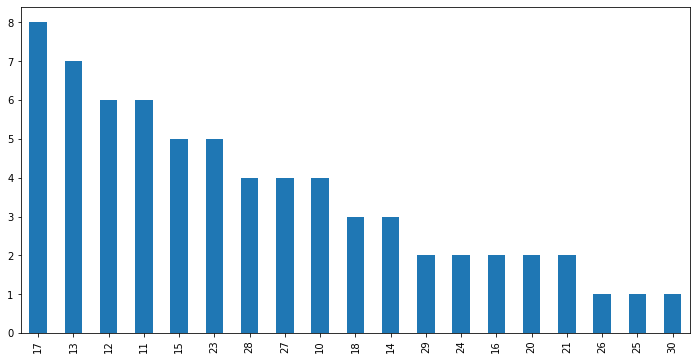

In [19]:
# Plot fragment length distribution.
df_precursor["Fragment sequence"].map(len).value_counts().plot.bar(figsize = (12, 6))